In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [46]:
#read dataset as 
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')
#print first 10 rows of dataset
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [47]:
#print last 10 rows of dataset
df.tail(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5101,36901,Female,45.0,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5103,22127,Female,18.0,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [48]:
#print number of rows and columns of the dataset.
df.shape

(5110, 12)

This dataset contain 5110 rows and 12 columns.

In [49]:
#print name of the each column.
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [50]:
#check more information about dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [51]:
#check null values in the each row
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

bmi column has 201 null values.

In [52]:
#print mean value of the bmi column.
print("Mean value of the BMI column = ",df['bmi'].mean())
#replace null values in the bmi column usig it's mean value.
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

Mean value of the BMI column =  28.893236911794673


In [53]:
#check null values in the each row
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [54]:
#check duplicate values in the dataset.
df.duplicated().sum()

0

This dataset doesn't contain duplicate values.

In [55]:
#get detailed about numerical values
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Data representation using graphs

Value count :
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64



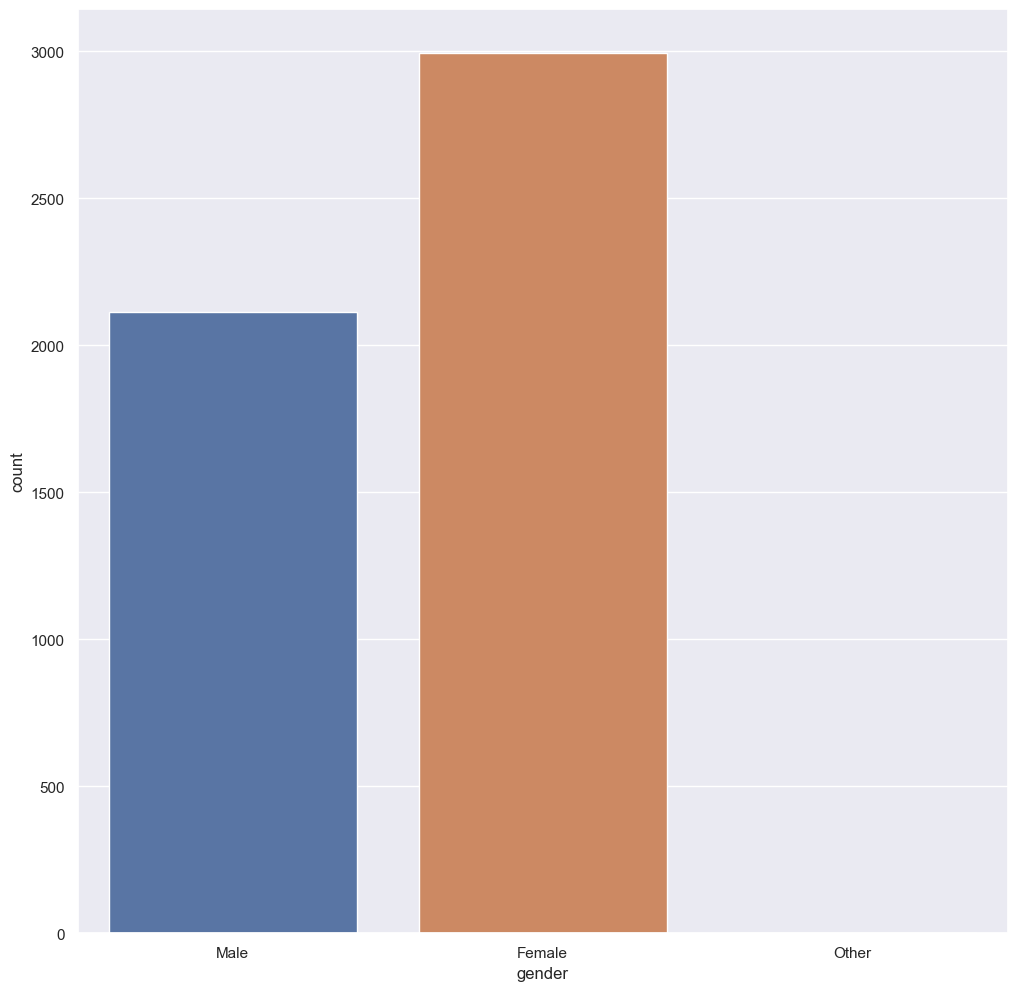

In [56]:
print("Value count :")
print(df['gender'].value_counts())
print("")

sns.set()
plt.figure(figsize = (12, 12))
sns.countplot(x = 'gender', data = df)
plt.show()

Value count :
Yes    3353
No     1757
Name: ever_married, dtype: int64



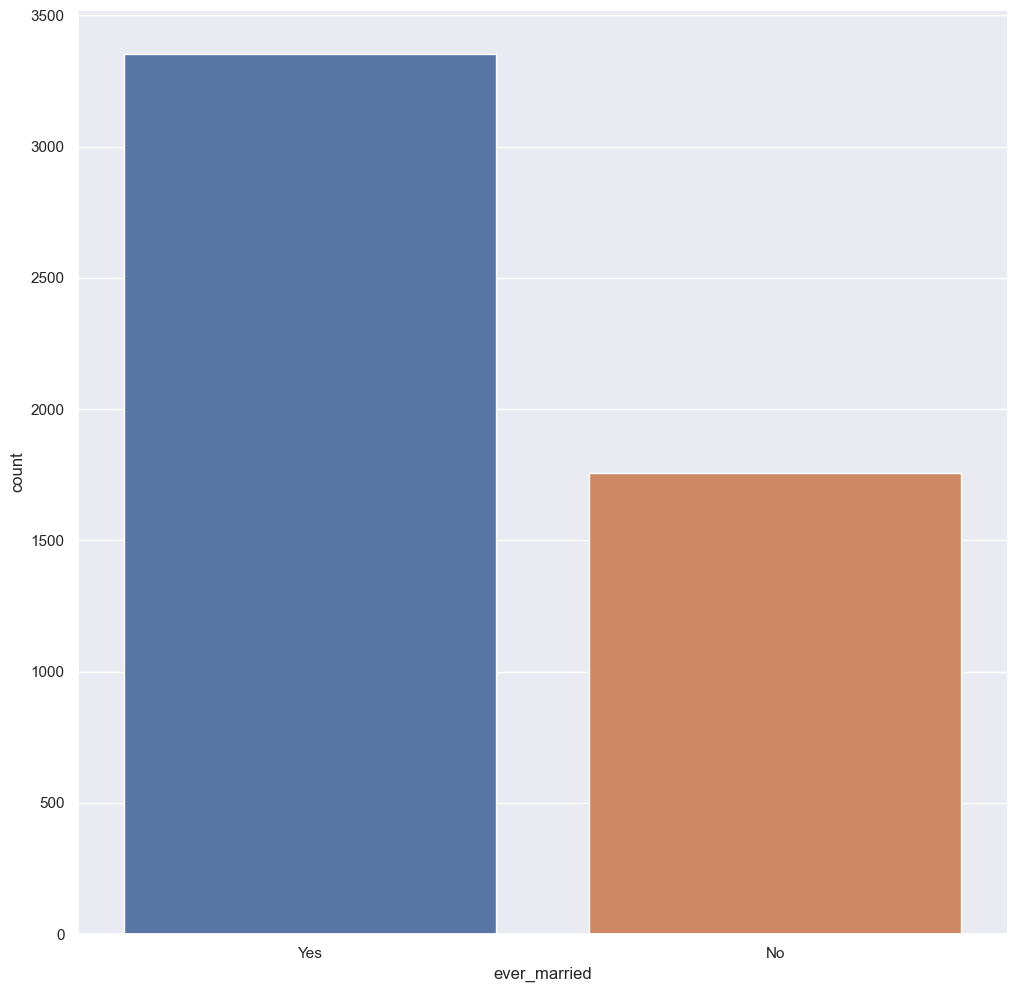

In [57]:
print("Value count :")
print(df['ever_married'].value_counts())
print("")

sns.set()
plt.figure(figsize = (12, 12))
sns.countplot(x = 'ever_married', data = df)
plt.show()

Value count :
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64



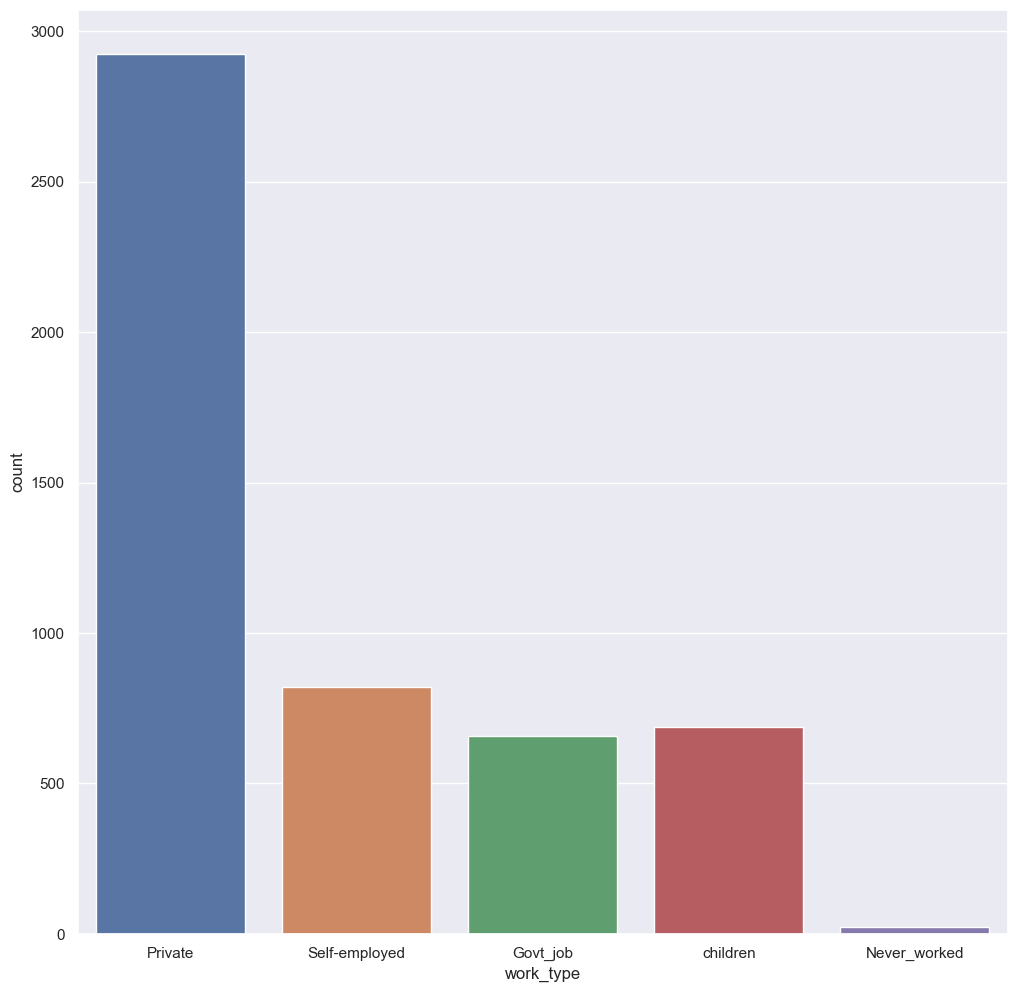

In [58]:
print("Value count :")
print(df['work_type'].value_counts())
print("")

sns.set()
plt.figure(figsize = (12, 12))
sns.countplot(x = 'work_type', data = df)
plt.show()

Value count :
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64



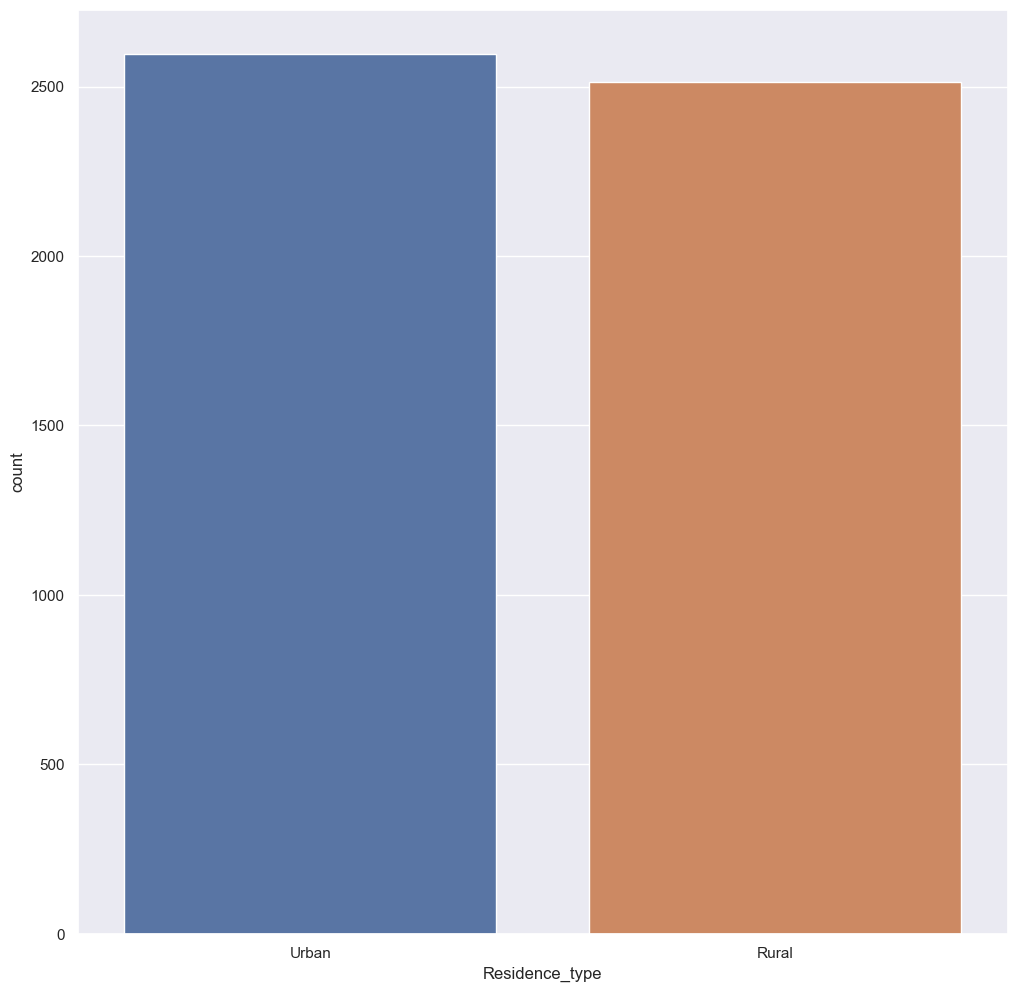

In [59]:
print("Value count :")
print(df['Residence_type'].value_counts())
print("")

sns.set()
plt.figure(figsize = (12, 12))
sns.countplot(x = 'Residence_type', data = df)
plt.show()

Value count :
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64



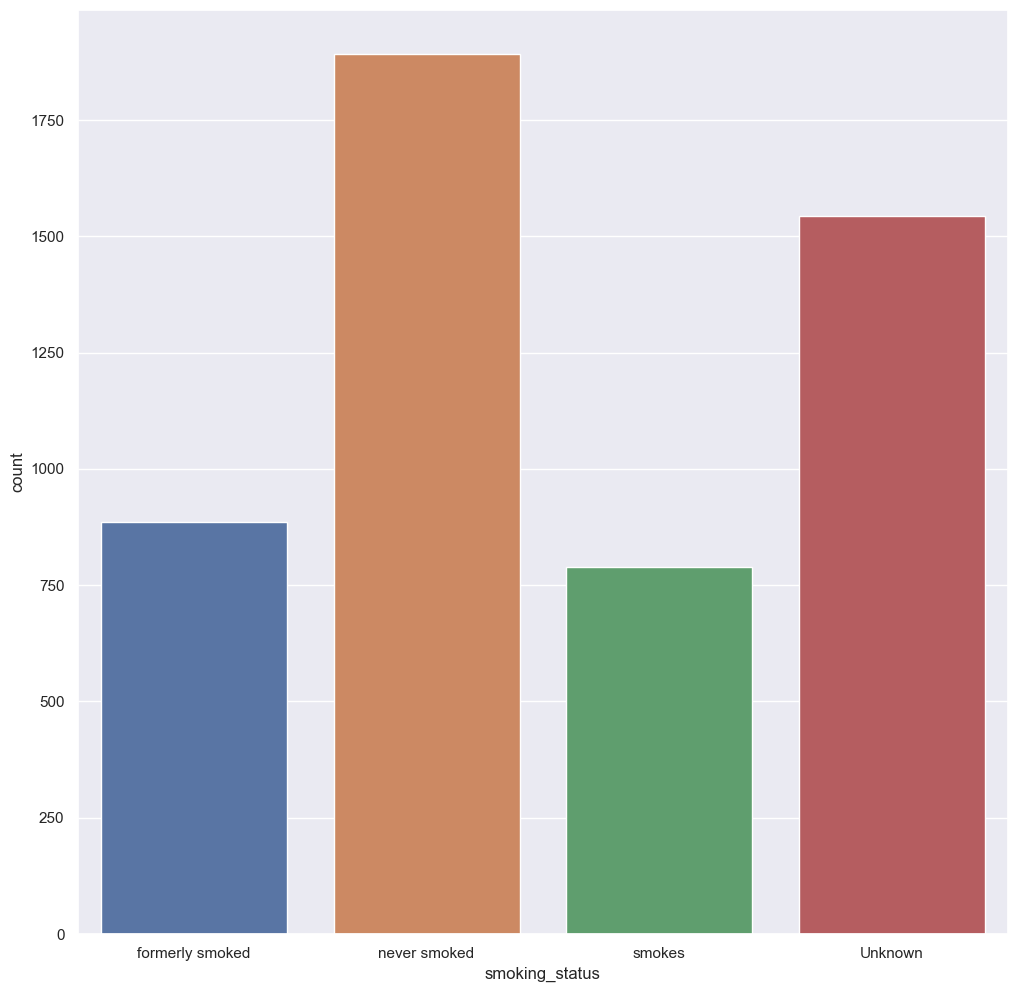

In [60]:
print("Value count :")
print(df['smoking_status'].value_counts())
print("")

sns.set()
plt.figure(figsize = (12, 12))
sns.countplot(x = 'smoking_status', data = df)
plt.show()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

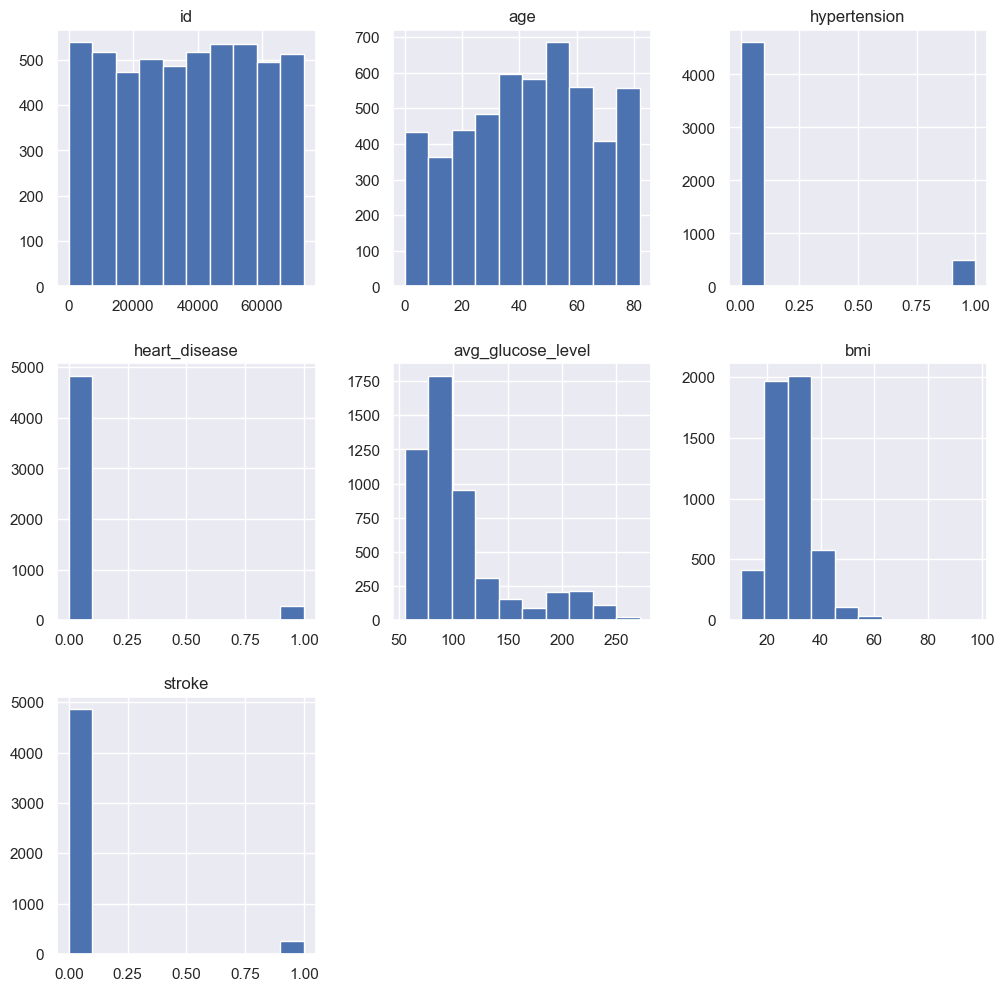

In [61]:
df.hist(figsize = (12, 12))

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


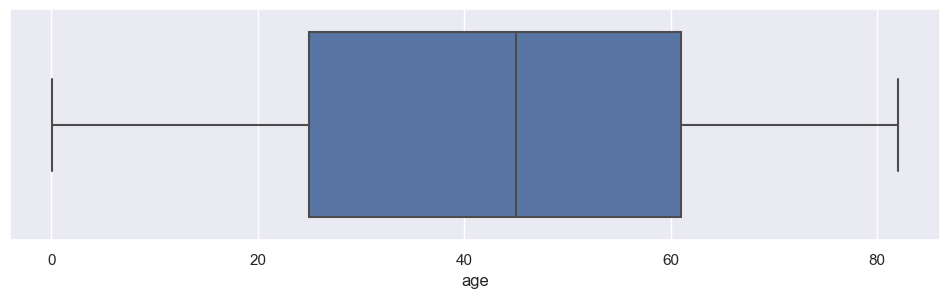

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


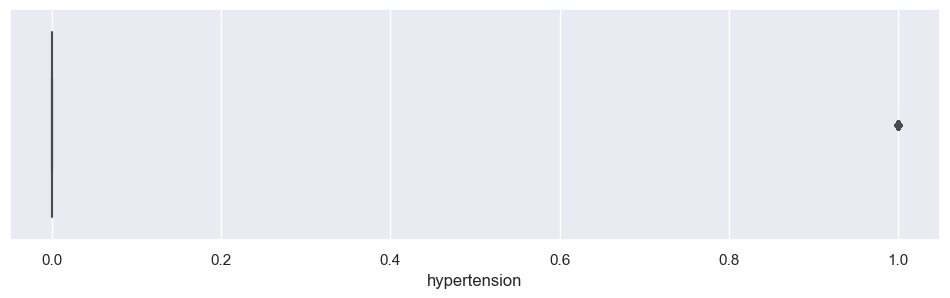

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


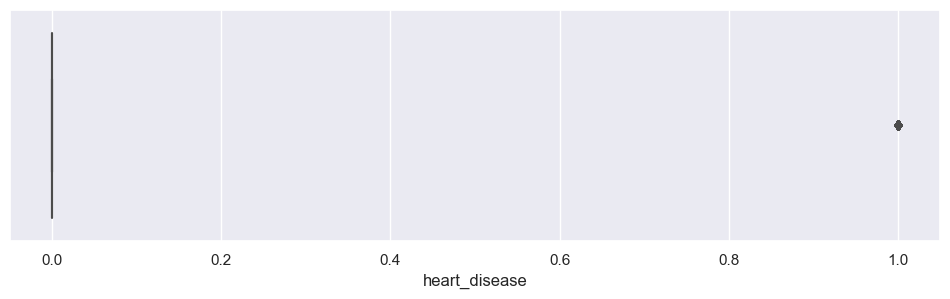

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


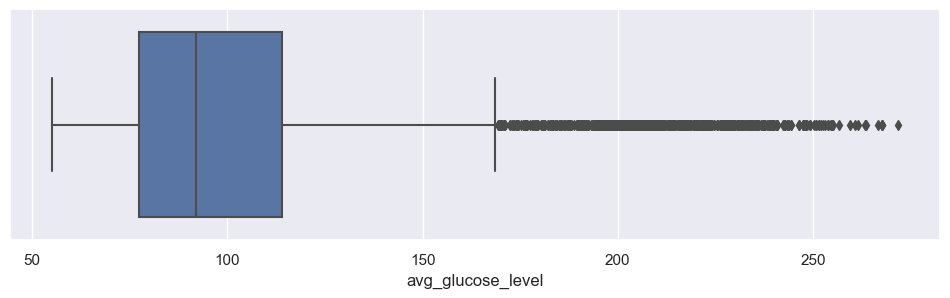

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


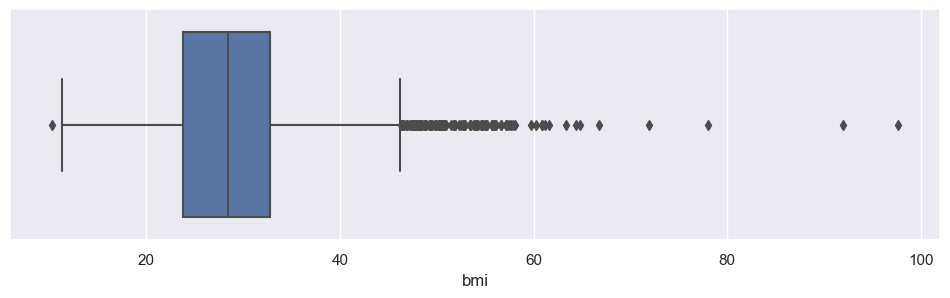

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


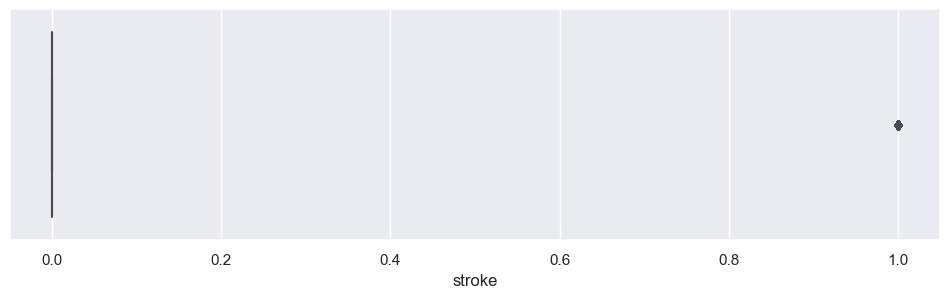

In [62]:
c = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'stroke']

for i in c:
    sns.set()
    plt.figure(figsize = (12, 3))
    sns.boxplot(df[i])
    plt.show()

<Figure size 1300x1300 with 0 Axes>

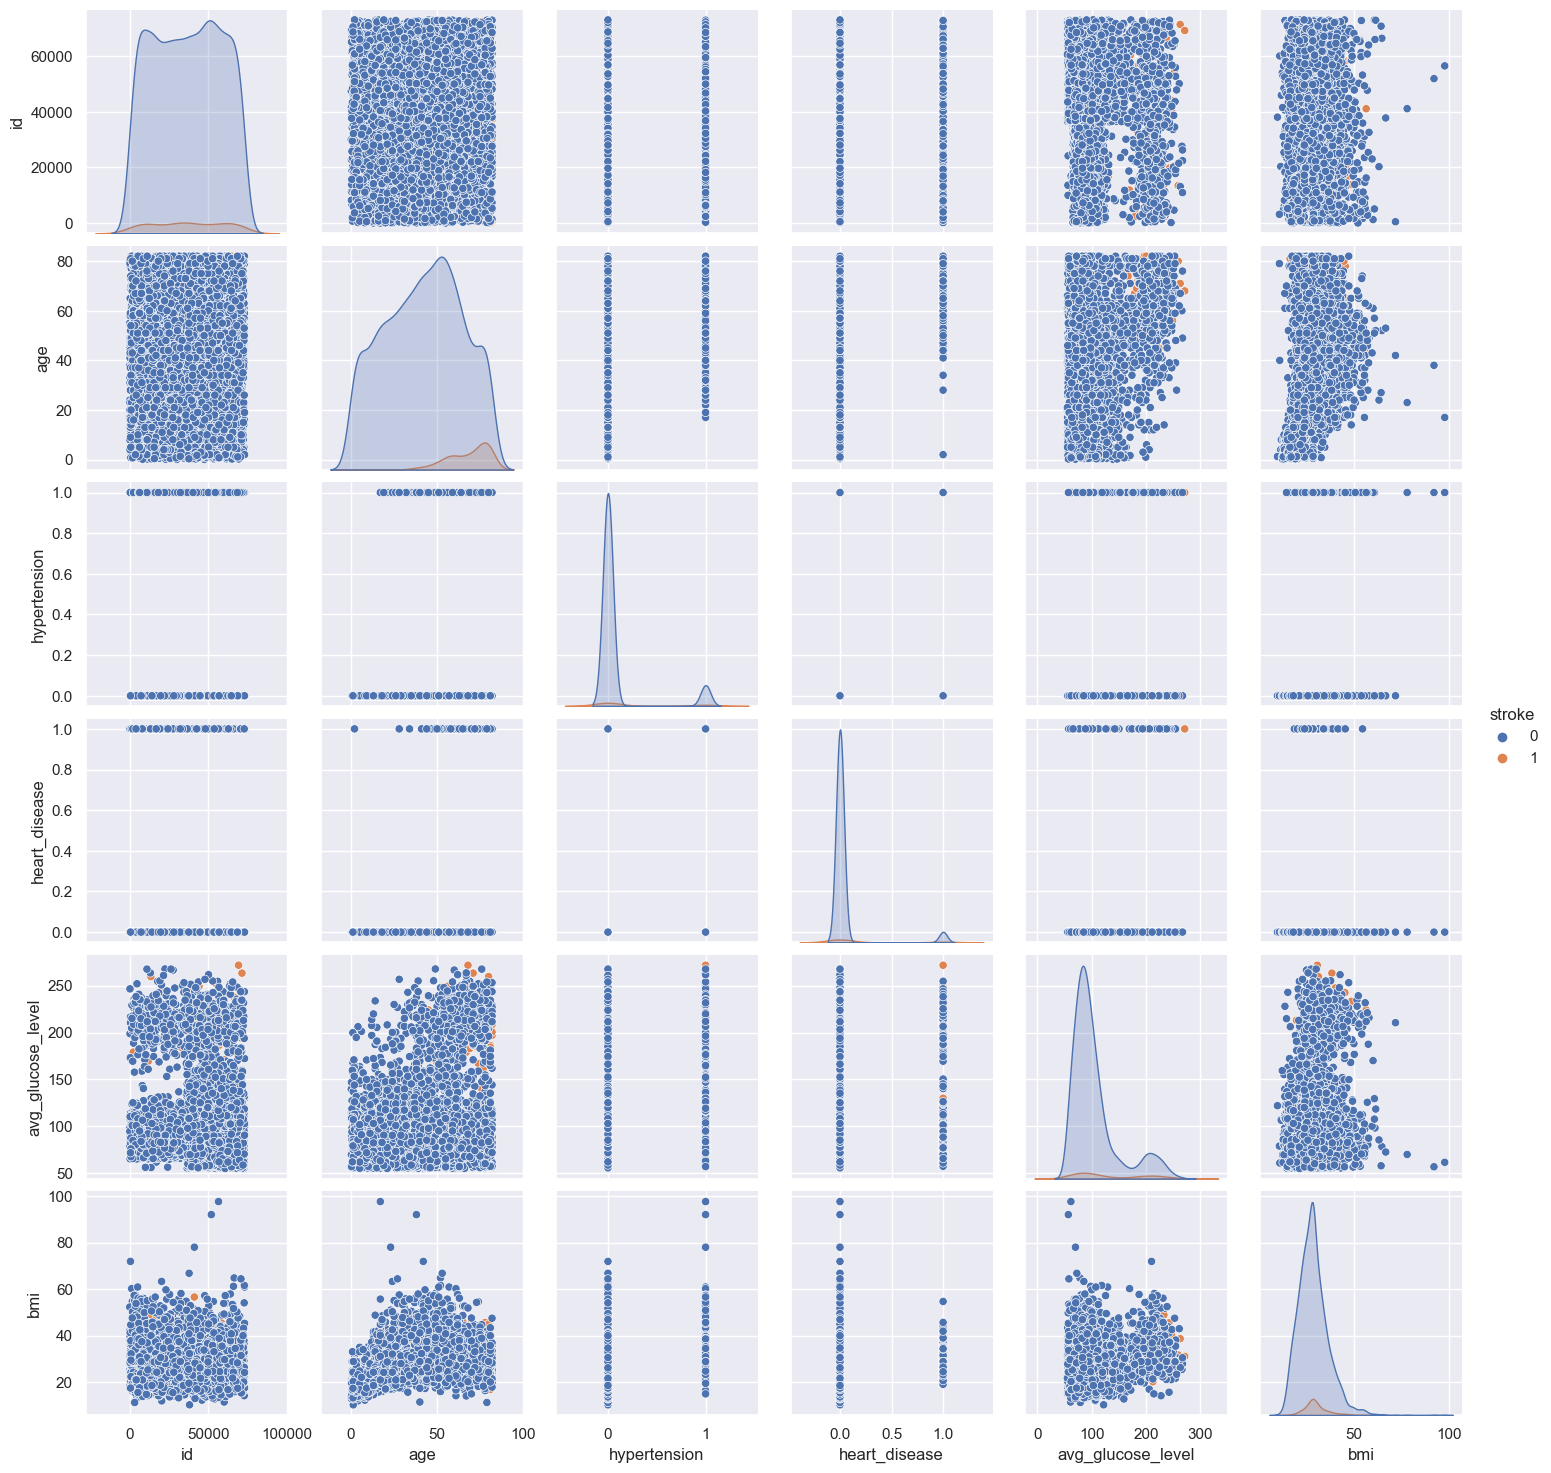

In [63]:
sns.set()
plt.figure(figsize = (13, 13))
sns.pairplot(df, hue = 'stroke')
plt.show()

In [64]:
#Encode the value
le = LabelEncoder()


df['gender1'] = le.fit_transform(df['gender'])
df['ever_married1'] = le.fit_transform(df['ever_married'])
df['work_type1'] = le.fit_transform(df['work_type'])
df['Residence_type1'] = le.fit_transform(df['Residence_type'])
df['smoking_status1'] = le.fit_transform(df['smoking_status'])

In [65]:
c = ('gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status')   
for i in c:
    print(i, "column :")
    d = np.sort(df[i].unique())
    print(d)
    print("")
    k = 0 
    for j in d:
        print(j, "--->", k)
        k = k + 1
    print("")
    print("----------------------------------------------------------------------------------------------------------------")

gender column :
['Female' 'Male' 'Other']

Female ---> 0
Male ---> 1
Other ---> 2

----------------------------------------------------------------------------------------------------------------
ever_married column :
['No' 'Yes']

No ---> 0
Yes ---> 1

----------------------------------------------------------------------------------------------------------------
work_type column :
['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']

Govt_job ---> 0
Never_worked ---> 1
Private ---> 2
Self-employed ---> 3
children ---> 4

----------------------------------------------------------------------------------------------------------------
Residence_type column :
['Rural' 'Urban']

Rural ---> 0
Urban ---> 1

----------------------------------------------------------------------------------------------------------------
smoking_status column :
['Unknown' 'formerly smoked' 'never smoked' 'smokes']

Unknown ---> 0
formerly smoked ---> 1
never smoked ---> 2
smokes ---> 3

-----------

In [66]:
df.head(8)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender1,ever_married1,work_type1,Residence_type1,smoking_status1
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,1,2,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,1,3,0,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,1,3,0,2
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,1,1,2,1,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,1,1,2,0,2
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,0,0,2,1,2


In [67]:
df['gender'] = df['gender1']
df['ever_married'] = df['ever_married1']
df['work_type'] = df['work_type1']
df['Residence_type'] = df['Residence_type1']
df['smoking_status'] = df['smoking_status1']

df.drop(columns = ['id', 'gender1', 'ever_married1', 'work_type1', 'Residence_type1', 'smoking_status1'], axis = 1, inplace = True)

df.head(8)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
5,1,81.0,0,0,1,2,1,186.21,29.000000,1,1
6,1,74.0,1,1,1,2,0,70.09,27.400000,2,1
7,0,69.0,0,0,0,2,1,94.39,22.800000,2,1


In [68]:
#split data into dataset x and y
x = df.drop(columns = 'stroke', axis = 1)
y = df['stroke']

In [69]:
x.head(6)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
5,1,81.0,0,0,1,2,1,186.21,29.000000,1


In [70]:
y.head(6)

0    1
1    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 20)

In [72]:
print("x_train has : ")
print(x_train.shape[0], "rows and ", x_train.shape[1] ,"columns")
print("------------------------------------------------------------------------------------------------------------")

print("y_train has : ")
print(y_train.shape[0], "rows and "," 1 column")
print("------------------------------------------------------------------------------------------------------------")

print("x_test has : ")
print(x_test.shape[0], "rows and ", x_test.shape[1] ,"columns")
print("------------------------------------------------------------------------------------------------------------")

print("y_test has : ")
print(y_test.shape[0], "rows and ", " 1 column")
print("------------------------------------------------------------------------------------------------------------")

x_train has : 
3577 rows and  10 columns
------------------------------------------------------------------------------------------------------------
y_train has : 
3577 rows and   1 column
------------------------------------------------------------------------------------------------------------
x_test has : 
1533 rows and  10 columns
------------------------------------------------------------------------------------------------------------
y_test has : 
1533 rows and   1 column
------------------------------------------------------------------------------------------------------------


In [77]:
#data standardization 
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [78]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [79]:
x_train = pd.DataFrame(x_train, columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])

x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.173349,0.693226,-0.331934,-0.238816,0.714533,-1.975644,0.988050,-0.104309,-0.320990,0.581376
1,1.173349,-1.568658,-0.331934,-0.238816,-1.399515,1.677434,0.988050,0.038450,-1.138241,-1.290434
2,-0.850310,-0.016385,-0.331934,-0.238816,0.714533,-1.975644,-1.012094,0.032474,-0.005527,0.581376
3,1.173349,-0.105086,-0.331934,-0.238816,0.714533,0.764164,-1.012094,-0.565119,0.588531,-0.354529
4,1.173349,1.580239,-0.331934,-0.238816,0.714533,-0.149105,0.988050,2.054772,-0.531893,0.581376


In [80]:
x_test = pd.DataFrame(x_test, columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'])
x_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.173349,-0.149437,3.012649,-0.238816,0.714533,0.764164,0.988050,-0.282258,-0.545075,1.517281
1,-0.850310,0.604525,-0.331934,-0.238816,0.714533,-1.975644,0.988050,-0.189521,1.194878,-1.290434
2,-0.850310,0.693226,-0.331934,-0.238816,0.714533,0.764164,0.988050,-0.352199,-0.030998,-0.354529
3,1.173349,0.515823,-0.331934,-0.238816,0.714533,-0.149105,-1.012094,-1.086353,-0.004635,-0.354529
4,-0.850310,-0.282489,-0.331934,-0.238816,-1.399515,-0.149105,-1.012094,-0.291554,3.330274,0.581376


In [81]:
print("standard deviation of train data :")
print(x_train.std())
print("---------------------------------------------------------------------------------------------------------------")
print("")
print("standard deviation of test data :")
print(x_test.std())
print("---------------------------------------------------------------------------------------------------------------")

standard deviation of train data :
gender               1.00014
age                  1.00014
hypertension         1.00014
heart_disease        1.00014
ever_married         1.00014
work_type            1.00014
Residence_type       1.00014
avg_glucose_level    1.00014
bmi                  1.00014
smoking_status       1.00014
dtype: float64
---------------------------------------------------------------------------------------------------------------

standard deviation of test data :
gender               0.991925
age                  1.009438
hypertension         0.973009
heart_disease        1.001954
ever_married         1.013498
work_type            0.985630
Residence_type       1.000075
avg_glucose_level    1.007459
bmi                  1.048143
smoking_status       1.009474
dtype: float64
---------------------------------------------------------------------------------------------------------------


In [83]:
#Logistic Regression

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

LogisticRegression()

In [87]:
lgr_train_data_pre = lgr.predict(x_train)
lgr_test_data_pre = lgr.predict(x_test)

lgr_train_data_acc = accuracy_score(lgr_train_data_pre, y_train)
lgr_test_data_acc = accuracy_score(lgr_test_data_pre, y_test)

print("Accuracy score of train data prediction using logistic regression : ", lgr_train_data_acc)
print("Accuracy score of test data prediction using logistic regression : ", lgr_test_data_acc)

Accuracy score of train data prediction using logistic regression :  0.9516354487000279
Accuracy score of test data prediction using logistic regression :  0.9510763209393346


In [92]:
#K-Neighbors Classifier

for i in range(1, 20):
    print("n_neighbors = ", i)
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    
    knn_train_data_pre = knn.predict(x_train)
    knn_test_data_pre = knn.predict(x_test)

    knn_train_data_acc = accuracy_score(knn_train_data_pre, y_train)
    knn_test_data_acc = accuracy_score(knn_test_data_pre, y_test)

    print("Accuracy score of train data prediction using K-Neighbors Classifier : ", knn_train_data_acc)
    print("Accuracy score of test data prediction using K-Neighbors Classifier : ", knn_test_data_acc)
    print("-----------------------------------------------------------------------------------------------------")

n_neighbors =  1


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  1.0
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9106327462491846
-----------------------------------------------------------------------------------------------------
n_neighbors =  2


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9541515236231479
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9497716894977168
-----------------------------------------------------------------------------------------------------
n_neighbors =  3


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9569471624266145
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9393346379647749
-----------------------------------------------------------------------------------------------------
n_neighbors =  4


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9521945764607213
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  5


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9530332681017613
Accuracy score of test data prediction using K-Neighbors Classifier :  0.949119373776908
-----------------------------------------------------------------------------------------------------
n_neighbors =  6


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9504240052185258
-----------------------------------------------------------------------------------------------------
n_neighbors =  7


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.950796757058988
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9484670580560991
-----------------------------------------------------------------------------------------------------
n_neighbors =  8


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9504240052185258
-----------------------------------------------------------------------------------------------------
n_neighbors =  9


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9497716894977168
-----------------------------------------------------------------------------------------------------
n_neighbors =  10


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy score of train data prediction using K-Neighbors Classifier :  0.9510763209393346
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  11


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9510763209393346
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  12


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  13


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  14


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  15


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  16


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  17


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  18


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------
n_neighbors =  19


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9513558848196813
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346
-----------------------------------------------------------------------------------------------------


In [93]:
i  = 4
print("n_neighbors = ", i)
knn = KNeighborsClassifier(n_neighbors = i)
knn.fit(x_train, y_train)
    
knn_train_data_pre = knn.predict(x_train)
knn_test_data_pre = knn.predict(x_test)

knn_train_data_acc = accuracy_score(knn_train_data_pre, y_train)
knn_test_data_acc = accuracy_score(knn_test_data_pre, y_test)

print("Accuracy score of train data prediction using K-Neighbors Classifier : ", knn_train_data_acc)
print("Accuracy score of test data prediction using K-Neighbors Classifier : ", knn_test_data_acc)

n_neighbors =  4


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score of train data prediction using K-Neighbors Classifier :  0.9521945764607213
Accuracy score of test data prediction using K-Neighbors Classifier :  0.9510763209393346


In [100]:
#Decision Tree Classifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [101]:
dtc_train_data_pre = dtc.predict(x_train)
dtc_test_data_pre = dtc.predict(x_test)

dtc_train_data_acc = accuracy_score(dtc_train_data_pre, y_train)
dtc_test_data_acc = accuracy_score(dtc_test_data_pre, y_test)

print("Accuracy score of train data prediction using Decision Tree Classifier : ", dtc_train_data_acc)
print("Accuracy score of test data prediction using Decision Tree Classifier : ", dtc_test_data_acc)

Accuracy score of train data prediction using Decision Tree Classifier :  1.0
Accuracy score of test data prediction using Decision Tree Classifier :  0.9060665362035225


In [102]:
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [103]:
rfc_train_data_pre = rfc.predict(x_train)
rfc_test_data_pre =  rfc.predict(x_test)

rfc_train_data_acc = accuracy_score(rfc_train_data_pre, y_train)
rfc_test_data_acc = accuracy_score(rfc_test_data_pre, y_test)

print("Accuracy score of train data prediction using Random Forest Classifier : ", rfc_train_data_acc)
print("Accuracy score of test data prediction using Random Forest Classifier : ", rfc_test_data_acc)

Accuracy score of train data prediction using Random Forest Classifier :  1.0
Accuracy score of test data prediction using Random Forest Classifier :  0.9510763209393346


In [104]:
acc = pd.DataFrame({'Algorithm' : ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier'], 'Test data accuracy score':[lgr_test_data_acc, knn_test_data_acc, dtc_test_data_acc, rfc_test_data_acc]})  
  
print(acc)  

                Algorithm  Test data accuracy score
0      LogisticRegression                  0.951076
1    KNeighborsClassifier                  0.951076
2  DecisionTreeClassifier                  0.906067
3  RandomForestClassifier                  0.951076


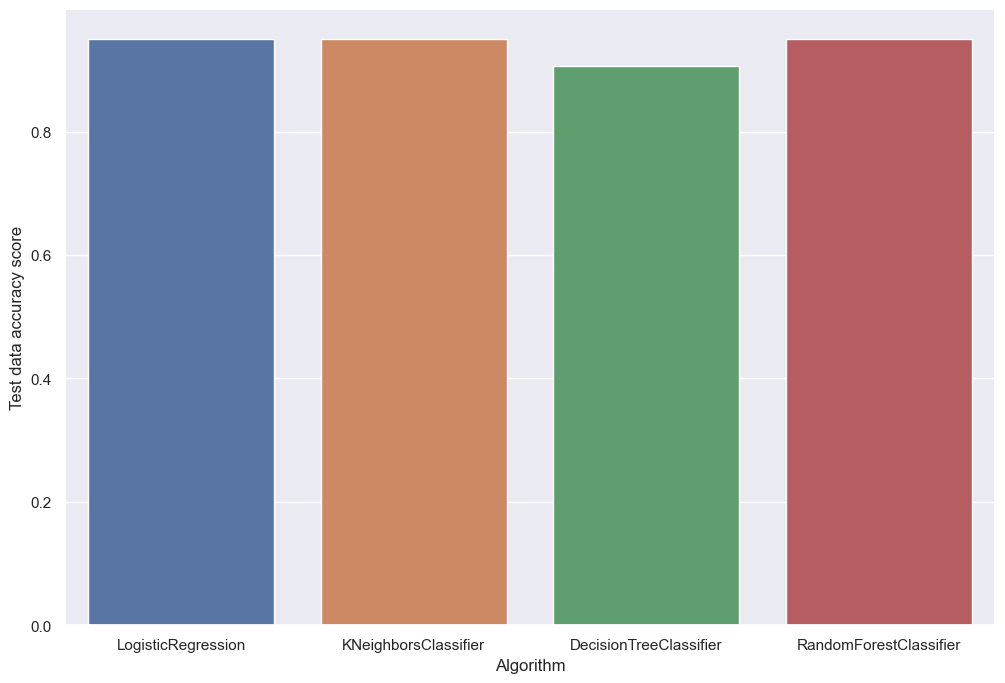

In [111]:
sns.set()
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Algorithm', y = 'Test data accuracy score', data = acc)
plt.show()

In [115]:
input_data = (1, 67.0, 0, 1, 1, 2, 1, 228.69, 36.600000, 1)
input_arr = np.asarray(input_data).reshape(1, -1)

dtc_pre = dtc.predict(input_arr)
print("Predicted value using DecisionTreeClassifier = ", dtc_pre)

print(" ")
if(dtc_pre == 0):
    print("Predicted value using RandomForestClassifier is Not stroke")
else:
    print("Predicted value using RandomForestClassifier is stroke")

Predicted value using DecisionTreeClassifier =  [1]
 
Predicted value using RandomForestClassifier is stroke


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
